In [1]:
from server import find_edital_by_question

/home/mignoe/Documents/git/EdiTalk-Bot/server.py:34: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
/home/mignoe/.conda/envs/dev/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Creating vectors for representative questions...


100%|██████████| 6/6 [00:03<00:00,  1.72it/s]


In [1]:
import json

with open("edital_name_to_file_path.json", "r") as f:
    edital_name_to_file_path = json.load(f)

editais = list(edital_name_to_file_path["editais"].keys())

editais

['Edital Nº 02/2025 UFCG (Procedimento Complementar à Autodeclaração PPI/PCD)',
 'Edital Nº 01/ETSC Retificado/2025',
 'Edital Auxílio Emergencial Estudantil (AEE) UFCG/PRAC/CGAE Nº 01/2025',
 'Edital Cadastro Socioeconômico (UFCG/PRAC/CGAE Nº 03/2025)',
 'AUXÍLIO AATIVIDADES OBRIGATÓRIAS EXTERNAS',
 'PPC Ciência da Computação (Bacharelado) – UFCG']

In [2]:
with open("test_set.json", "r") as f:
    test_set = json.load(f) 

for edital in test_set.keys():
    if edital not in editais:
        print(f"Edital {edital} not found in editais list")

set(test_set.keys()) == set(editais)

True

In [4]:
find_edital_by_question("Quais são os requisitos para participar do processo seletivo?")

'Edital Nº 01/ETSC Retificado/2025'

In [5]:
predicted = []
expected = []

for edital in test_set.keys():
    questions = test_set[edital]
    for question in questions:
        found_edital = find_edital_by_question(question)
        predicted.append(found_edital)
        expected.append(edital)
         

In [6]:
editais

['Edital Nº 02/2025 UFCG (Procedimento Complementar à Autodeclaração PPI/PCD)',
 'Edital Nº 01/ETSC Retificado/2025',
 'Edital Auxílio Emergencial Estudantil (AEE) UFCG/PRAC/CGAE Nº 01/2025',
 'Edital Cadastro Socioeconômico (UFCG/PRAC/CGAE Nº 03/2025)',
 'AUXÍLIO AATIVIDADES OBRIGATÓRIAS EXTERNAS',
 'PPC Ciência da Computação (Bacharelado) – UFCG']

In [3]:
map_titles = {
    "PPC Ciência da Computação (Bacharelado) – UFCG": "PPC Computação",
    "Edital Nº 02/2025 UFCG (Procedimento Complementar à Autodeclaração PPI/PCD)": "Autodeclaração PPI/PCD",
    "Edital Auxílio Emergencial Estudantil (AEE) UFCG/PRAC/CGAE Nº 01/2025": "Auxílio Emergencial Estudantil",
    "Edital Cadastro Socioeconômico (UFCG/PRAC/CGAE Nº 03/2025)": "Cadastro Socioeconômico",
    "AUXÍLIO AATIVIDADES OBRIGATÓRIAS EXTERNAS": "Auxílio Atividades Externas",
    "Edital Nº 01/ETSC Retificado/2025": "Edital Inscrições ETSC 2025"
}

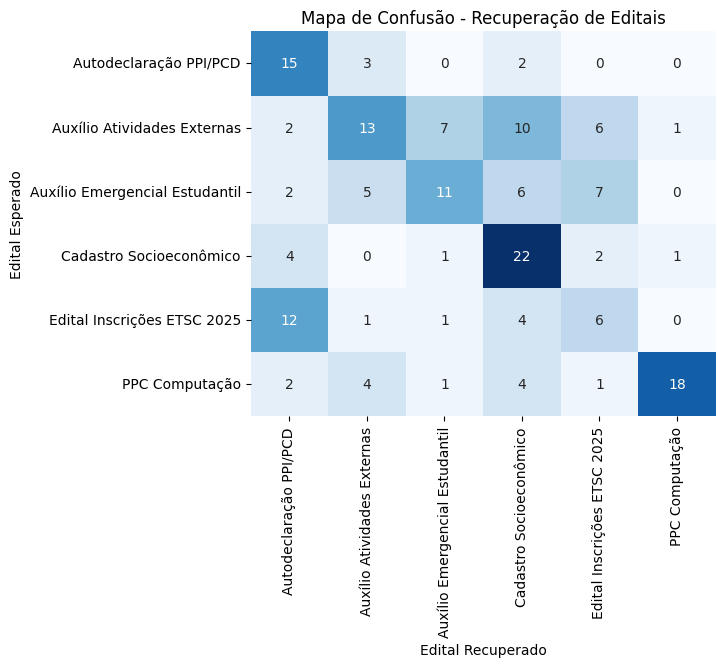

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_true = [map_titles[e] for e in expected]
y_pred = [map_titles[p] for p in predicted]

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
# Plot heatmap without the color bar
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true), cbar=False)
plt.xlabel('Edital Recuperado')
plt.ylabel('Edital Esperado')
plt.title('Mapa de Confusão - Recuperação de Editais')
plt.show()


In [16]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report

y_test_true = np.array(y_true)
y_test_pred = np.array(y_pred)

accuracy_test = accuracy_score(y_test_true, y_test_pred)
f1_test = f1_score(y_test_true, y_test_pred, average='macro')
report_test = classification_report(y_test_true, y_test_pred)

print(f"\nTest Accuracy: {accuracy_test:.4f}")
print(f"Test F1-score: {f1_test:.4f}")
print("Test Classification report:")
print(report_test)


Test Accuracy: 0.4885
Test F1-score: 0.4824
Test Classification report:
                                precision    recall  f1-score   support

        Autodeclaração PPI/PCD       0.41      0.75      0.53        20
   Auxílio Atividades Externas       0.50      0.33      0.40        39
Auxílio Emergencial Estudantil       0.52      0.35      0.42        31
       Cadastro Socioeconômico       0.46      0.73      0.56        30
   Edital Inscrições ETSC 2025       0.27      0.25      0.26        24
                PPC Computação       0.90      0.60      0.72        30

                      accuracy                           0.49       174
                     macro avg       0.51      0.50      0.48       174
                  weighted avg       0.52      0.49      0.48       174



In [9]:
import pandas as pd

data = {
    "Edital": [map_titles[e] for e in editais],
    "Número de Questões": [len(test_set[e]) for e in editais]
}

df_summary = pd.DataFrame(data)
df_summary

,Edital,Número de Questões
0,Autodeclaração PPI/PCD,20
1,Edital Inscrições ETSC 2025,24
2,Auxílio Emergencial Estudantil,31
3,Cadastro Socioeconômico,30
4,Auxílio Atividades Externas,39
5,PPC Computação,30


In [11]:
editais

['Edital Nº 02/2025 UFCG (Procedimento Complementar à Autodeclaração PPI/PCD)',
 'Edital Nº 01/ETSC Retificado/2025',
 'Edital Auxílio Emergencial Estudantil (AEE) UFCG/PRAC/CGAE Nº 01/2025',
 'Edital Cadastro Socioeconômico (UFCG/PRAC/CGAE Nº 03/2025)',
 'AUXÍLIO AATIVIDADES OBRIGATÓRIAS EXTERNAS',
 'PPC Ciência da Computação (Bacharelado) – UFCG']

In [12]:
find_edital_by_question(test_set[editais[1]][0])

'AUXÍLIO AATIVIDADES OBRIGATÓRIAS EXTERNAS'

In [16]:
find_edital_by_question('Qual instituição é responsável pela organização do processo seletivo da Escola Técnica de Saúde de Cajazeiras /UFCG?')

'AUXÍLIO AATIVIDADES OBRIGATÓRIAS EXTERNAS'

In [15]:
test_set[editais[1]][0]

'Qual instituição é responsável pela organização do processo seletivo da ETSC/UFCG?'